In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Notebook to extract cell patches from WSI

In [31]:
from openslide import OpenSlide
from pathlib import Path
import pandas as pd
from tqdm import tqdm

In [20]:
slides_path = Path("../../Slides/Equine")
result_patches_folder_train = slides_path / "Patches" / "train"
result_patches_folder_val = slides_path / "Patches" / "val"

result_patches_folder_train.mkdir(parents=True, exist_ok=True)
result_patches_folder_val.mkdir(parents=True, exist_ok=True)


srep_slides_train = list(set(["08_EIPH_574999 R Turnbull blue.svs", 
                              "22_EIPH_575216 Turnbull blue.svs", 
                              "28_EIPH_569948 L Turnbull blue.svs", 
                              "07_EIPH_574882 left lung Turnbull blue.svs", 
                              "08_EIPH_574999 R Turnbull blue.svs", 
                              "09_EIPH_563417 L Turnbull blue.svs", 
                              "14_EIPH_568381 Turnbull blue.svs", 
                              "28_EIPH_569948 L Turnbull blue.svs", 
                              "29_EIPH_566481 L Turnbull blue.svs",
                              
                              "01_EIPH_563479 Berliner Blau.svs", 
                              "02_EIPH_574162 berliner blau.svs",
                              "03_EIPH_566933 R Berliner Blau neu.svs",
                              "04_EIPH_567017 Berliner Blau.svs",
                              "05_EIPH_569923 Berliner Blau.svs", 
                              "20_EIPH_576150 berliner blau.svs", 
                              "01_EIPH_563479 Berliner Blau.svs", 
                              "02_EIPH_574162 berliner blau.svs", 
                              "03_EIPH_566933 R Berliner Blau neu.svs",
                              "04_EIPH_567017 Berliner Blau.svs", 
                              "05_EIPH_569923 Berliner Blau.svs",     
                              "26_EIPH_566482 L Berliner Blau.svs",
                              "27_EIPH_571557 berliner blau.svs",
                              "31_EIPH_568354 Berliner Blau.svs"]))

srep_slides_val = list(set(["11_EIPH_575697 Berliner Blau.svs", 
                            "20_EIPH_576150 berliner blau.svs", 
                            "22_EIPH_575216 Turnbull blue.svs"]))

In [15]:
annotations_path = Path("../Statistics/SDATA_Final_Annotations.pkl")
annotations = pd.read_pickle(annotations_path)
annotations_train = annotations[annotations["image_name"].isin(srep_slides_train)]
annotations_val = annotations[annotations["image_name"].isin(srep_slides_val)]
annotations_train.head()

,id,image_id,image_set,species,image_name,image_type,grade,vector,user_id,deleted,last_editor,data_set_name,version
unique_identifier,,,,,,,,,,,,,
52176097-849f-4f32-ba94-5893e5a86475,2327744,5204,269,equine,07_EIPH_574882 left lung Turnbull blue.svs,Turnbull,0,"{'x1': 16616, 'x2': 16714, 'y1': 3530, 'y2': 3...",1,False,1,SREP,Density
6aaee957-79af-4510-9e54-d011c4f1be45,2327746,5204,269,equine,07_EIPH_574882 left lung Turnbull blue.svs,Turnbull,0,"{'x1': 15894, 'x2': 16022, 'y1': 3803, 'y2': 3...",1,False,1,SREP,Density
85a3808d-88a7-4056-a7ab-e9f804cdb291,2327748,5204,269,equine,07_EIPH_574882 left lung Turnbull blue.svs,Turnbull,0,"{'x1': 16609, 'x2': 16753, 'y1': 4175, 'y2': 4...",1,False,1,SREP,Density
02ec16d8-475f-4504-b8a8-fea5a3535449,2327750,5204,269,equine,07_EIPH_574882 left lung Turnbull blue.svs,Turnbull,0,"{'x1': 16764, 'x2': 16872, 'y1': 4340, 'y2': 4...",1,False,1,SREP,Density
15a57471-695e-41fa-b868-95b2bf247dd3,2327752,5204,269,equine,07_EIPH_574882 left lung Turnbull blue.svs,Turnbull,0,"{'x1': 17050, 'x2': 17158, 'y1': 4302, 'y2': 4...",1,False,1,SREP,Density


In [18]:
train_files = {slide.name: slide for slide in slides_path.rglob("*.svs")  if slide.name in srep_slides_train}
train_files

{'01_EIPH_563479 Berliner Blau.svs': PosixPath('../../Slides/Equine/01_EIPH_563479 Berliner Blau.svs'),
 '02_EIPH_574162 berliner blau.svs': PosixPath('../../Slides/Equine/02_EIPH_574162 berliner blau.svs'),
 '03_EIPH_566933 R Berliner Blau neu.svs': PosixPath('../../Slides/Equine/03_EIPH_566933 R Berliner Blau neu.svs'),
 '04_EIPH_567017 Berliner Blau.svs': PosixPath('../../Slides/Equine/04_EIPH_567017 Berliner Blau.svs'),
 '05_EIPH_569923 Berliner Blau.svs': PosixPath('../../Slides/Equine/05_EIPH_569923 Berliner Blau.svs'),
 '07_EIPH_574882 left lung Turnbull blue.svs': PosixPath('../../Slides/Equine/07_EIPH_574882 left lung Turnbull blue.svs'),
 '09_EIPH_563417 L Turnbull blue.svs': PosixPath('../../Slides/Equine/09_EIPH_563417 L Turnbull blue.svs'),
 '14_EIPH_568381 Turnbull blue.svs': PosixPath('../../Slides/Equine/14_EIPH_568381 Turnbull blue.svs'),
 '20_EIPH_576150 berliner blau.svs': PosixPath('../../Slides/Equine/20_EIPH_576150 berliner blau.svs'),
 '22_EIPH_575216 Turnbull bl

In [19]:
val_files = {slide.name: slide for slide in slides_path.rglob("*.svs")  if slide.name in srep_slides_val}
val_files

{'11_EIPH_575697 Berliner Blau.svs': PosixPath('../../Slides/Equine/11_EIPH_575697 Berliner Blau.svs'),
 '20_EIPH_576150 berliner blau.svs': PosixPath('../../Slides/Equine/20_EIPH_576150 berliner blau.svs'),
 '22_EIPH_575216 Turnbull blue.svs': PosixPath('../../Slides/Equine/22_EIPH_575216 Turnbull blue.svs')}

In [36]:
for train_name, train_path in tqdm(train_files.items(), "Slide.."):

    slide = OpenSlide(str(train_path))

    file_annos = annotations_train[annotations_train["image_name"] == train_name]

    for anno_id, anno in file_annos.iterrows():

        x1, y1, x2, y2 = anno.vector["x1"], anno.vector["y1"], anno.vector["x2"], anno.vector["y2"]

        patch = slide.read_region((x1, y1), 0, (x2-x1, y2-y1))

        grade_folder = result_patches_folder_train / f"{anno.grade}"
        grade_folder.mkdir(parents=True, exist_ok=True)

        file_name = grade_folder / f"{anno_id}.png"
        patch.save(str(file_name))

Slide..: 100%|██████████| 15/15 [15:17<00:00, 61.17s/it]


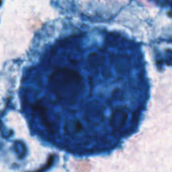

In [38]:
patch

In [37]:
for val_name, val_path in tqdm(val_files.items(), "Slide.."):

    slide = OpenSlide(str(val_path))

    file_annos = annotations_val[annotations_val["image_name"] == val_name]

    for anno_id, anno in file_annos.iterrows():

        x1, y1, x2, y2 = anno.vector["x1"], anno.vector["y1"], anno.vector["x2"], anno.vector["y2"]

        patch = slide.read_region((x1, y1), 0, (x2-x1, y2-y1))

        grade_folder = result_patches_folder_val / f"{anno.grade}"
        grade_folder.mkdir(parents=True, exist_ok=True)

        file_name = grade_folder / f"{anno_id}.png"
        patch.save(str(file_name))

Slide..: 100%|██████████| 3/3 [03:03<00:00, 61.03s/it]
